In [399]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import _autolag
from statsmodels.tsa.api import VAR
import seaborn as sns
#sns.set_theme()
#from scipy.stats import pearsonr

DATA PREPARATION

In [400]:
data_df=pd.read_excel('Gas Data processed.xlsx',sheet_name="code_monthly")
df=data_df.loc[1:141,["months", "price_gas", "price_brent_gbp","price_brent_usd","open_interest_gas","lng","storage","temperature"]] 
print(df)

#first ets value at line 38

     months  price_gas  price_brent_gbp  price_brent_usd  open_interest_gas  \
1    Nov 09      29.57        46.579369            76.66              13795   
2    Dec 09      33.72        46.014033            74.46              12590   
3    Jan 10      38.77        47.677856            76.17              13650   
4    Feb 10      31.34        48.582063            73.75              12720   
5    Mar 10      29.71        51.917448            78.83              18530   
..      ...        ...              ...              ...                ...   
137  Mar 21      46.80        47.582502            65.41              44325   
138  Apr 21      60.24        46.449325            64.81              37515   
139  May 21      60.68        48.327371            68.53              35298   
140  Jun 21      85.87        52.850770            73.16              35409   
141  Jul 21     103.75        54.063540            75.17              31580   

          lng   storage  temperature  
1    1.27000

In [401]:
#Vector:
dprice_gas=df.price_gas
dprice_brent_gbp=df.price_brent_gbp
dprice_brent_usd=df.price_brent_usd
dOI=df.open_interest_gas
dtemp=df.temperature
dstore=df.storage
dlng=df.lng


DataSeries=[dprice_gas,dprice_brent_usd,dOI,dstore,dlng,dtemp]
df_test = pd.concat(DataSeries,axis=1)

In [402]:
######### INITIAL DATA TESTS #########

# stationarity describe an evolution following the same pattern overtime. Hence the relationship between variable are static
# stationarity test
# seasonality is not an issue as it can be predictable
# non linear trend can be corrected via applying a log
# take the difference to make the data stationary

from statsmodels.tsa.stattools import adfuller, kpss
######## NORMALITY TEST V2 ########

def normality_test_matrix(data, variables, test):    
    """Check normality test to comply with general model assumptions.
    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    test      : type of test to perform
    """

    col=['test statistic ','p-value ', 'lags used ']
    df = pd.DataFrame(np.zeros((len(variables), 3)), columns=col, index=variables)
    for r in df.index:
        if test == "Dickey-Fuller":
            dftestdickey = adfuller(data[r].values, autolag='AIC')
            for c in range(0,len(col)):
                df.loc[r, col[c]] = dftestdickey[c]           
        elif test == "KPSS":
            dftestkpss = kpss(data[r].values, regression='c', nlags="auto")
            for c in range(0,len(col)):
                df.loc[r, col[c]] = dftestkpss[c]

    print("Results for "+test+" test")
    df.columns = [var + test for var in col]

    #df.index = [var for var in variables]s
    return df


### styles ###

def highlight_cells_DF(series):
    highlight_true = 'background-color: green;'
    highlight_false = 'background-color: red;'
    default = ''
    return [highlight_true if e < 0.05 else highlight_false for e in series]  

def highlight_cells_KPSS(series):
    highlight_true = 'background-color: green;'
    highlight_false = 'background-color: red;'
    default = ''
    return [highlight_true if e > 0.05 else highlight_false for e in series]  


dfdifull = normality_test_matrix(df_test, variables = df_test.columns, test="Dickey-Fuller")
dfdifull.style.apply(highlight_cells_DF, subset=['p-value Dickey-Fuller'], axis=0)

Results for Dickey-Fuller test


,test statistic Dickey-Fuller,p-value Dickey-Fuller,lags used Dickey-Fuller
price_gas,-3.411662,0.010568,14.000000
price_brent_usd,-1.526733,0.520248,2.000000
open_interest_gas,-2.010535,0.281973,5.000000
storage,-2.367417,0.151145,11.000000
lng,-3.111721,0.025698,3.000000
temperature,-2.536485,0.106847,12.000000


In [403]:
dfkpss = normality_test_matrix(df_test, variables = df_test.columns, test="KPSS")
dfkpss.style.apply(highlight_cells_KPSS, subset=['p-value KPSS'], axis=0)

Results for KPSS test


/Users/lucruffie/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/Users/lucruffie/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
/Users/lucruffie/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
/Users/lucruffie/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range

,test statistic KPSS,p-value KPSS,lags used KPSS
price_gas,0.295364,0.100000,7.000000
price_brent_usd,0.921232,0.010000,8.000000
open_interest_gas,1.374996,0.010000,8.000000
storage,0.129035,0.100000,4.000000
lng,0.485408,0.044953,6.000000
temperature,0.070854,0.100000,5.000000


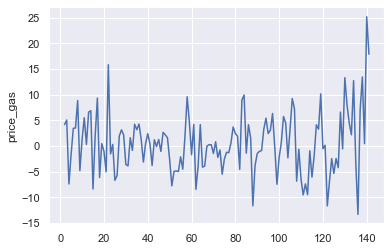

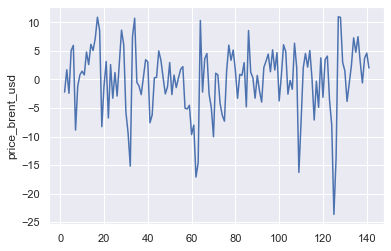

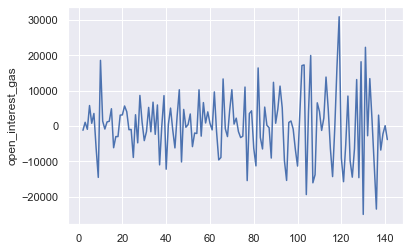

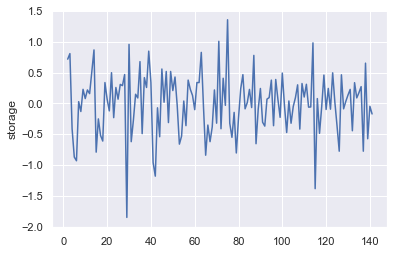

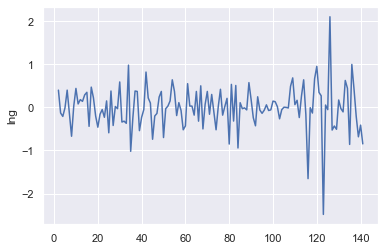

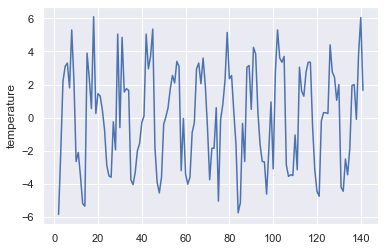

In [404]:
######### DATA CORRECTION #########
#ideally, for each set, apply specific changes
# detrending for linear processes
# differences for random walks 
# other ? non linear processes

#### differentiate 1
DataSeriesCorr=[]
for df in DataSeries:
    #if df.name == "price_gas":
    #    df_log = pd.Series(np.log(df))
    #    df = df_log
    #if df.name == "price_gas":
    #    df_diff=df[2:]
    #else:
    df_diff = df.diff().dropna()
    plt.plot(df_diff)
    plt.ylabel(df.name)
    plt.show()
    DataSeriesCorr.append(df_diff)


df_corr = pd.concat(DataSeriesCorr,axis=1)

In [405]:
######### STATIONARITY DATA TEST #########

# stationarity describe an evolution following the same pattern overtime. Hence the relationship between variable are static
# stationarity test
# seasonality is not an issue as it can be predictable
# non linear trend can be corrected via applying a log
# take the difference to make the data stationary


dfdifull = normality_test_matrix(df_corr, variables = df_corr.columns, test="Dickey-Fuller")
dfdifull.style.apply(highlight_cells_DF, subset=['p-value Dickey-Fuller'], axis=0)


Results for Dickey-Fuller test


,test statistic Dickey-Fuller,p-value Dickey-Fuller,lags used Dickey-Fuller
price_gas,-4.998262,0.000022,3.000000
price_brent_usd,-8.154873,0.000000,1.000000
open_interest_gas,-6.729783,0.000000,4.000000
storage,-10.260414,0.000000,10.000000
lng,-8.074454,0.000000,4.000000
temperature,-8.674652,0.000000,11.000000


In [406]:
dfkpss = normality_test_matrix(df_corr, variables = df_corr.columns, test="KPSS")
dfkpss.style.apply(highlight_cells_KPSS, subset=['p-value KPSS'], axis=0)

Results for KPSS test


/Users/lucruffie/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/Users/lucruffie/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/Users/lucruffie/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/Users/lucruffie/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range

,test statistic KPSS,p-value KPSS,lags used KPSS
price_gas,0.161582,0.100000,3.000000
price_brent_usd,0.101877,0.100000,2.000000
open_interest_gas,0.227665,0.100000,13.000000
storage,0.011649,0.100000,1.000000
lng,0.038340,0.100000,5.000000
temperature,0.017378,0.100000,5.000000


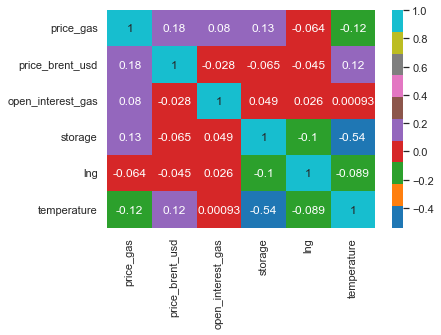

In [407]:
#### CORRELATION MATRIX ####

corrM=df_corr.corr()
#plt.imshow(corrM, cmap='hot', interpolation='nearest')
#plt.show()
ax=sns.heatmap(corrM, annot=True, cmap="tab10")


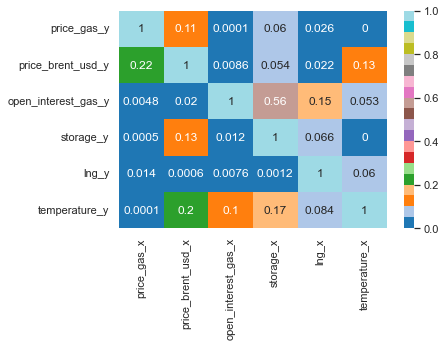

In [408]:
#### CORRECTED GRANGER CAUSALITY ####

from statsmodels.tsa.stattools import grangercausalitytests
maxlag=15
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    #plot
    sns.heatmap(df, annot=True, cmap="tab20")
    #return df


##### actual test
grangers_causation_matrix(df_corr, variables = df_corr.columns)        


/Users/lucruffie/Library/Python/3.8/lib/python/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


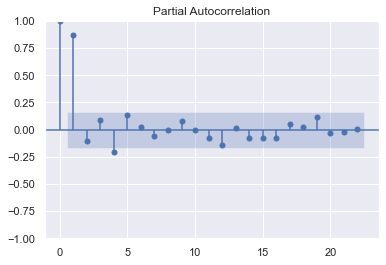

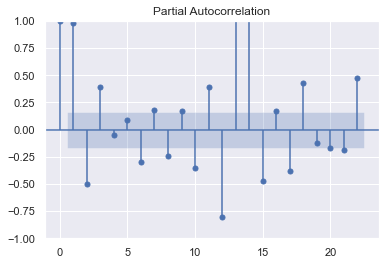

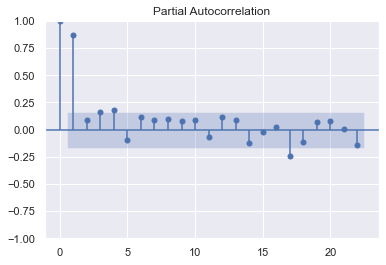

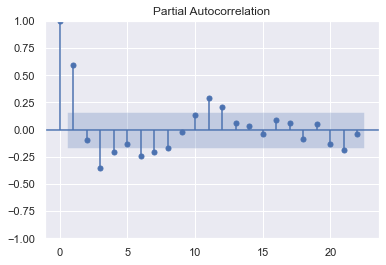

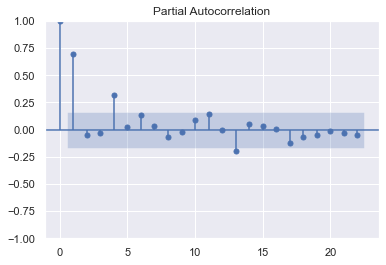

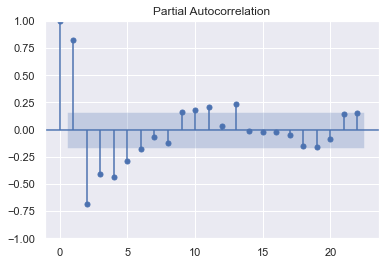

In [409]:
######### LAG LENGTH CRITERIA ######### either multiple of frequency or Schwarz, akaike, hannan-quinn, bayesian 

for df in DataSeries:
    plot_pacf(df)
    plt.show()

# for df in DataSeries:
#     lag_selection = _autolag(mod=VAR,endog=df, exog=df, startlag=1, maxlag=30, method="aic")
#     lag_selection.results()
#     #plt.show()


In [410]:
##### MODEL FITTING #####

model = VAR(df_corr)
x = model.select_order(maxlags=15)
x.summary()
#model_fit = model.fit(maxlags=10, ic="aic") #aic, or bic
#model_fit.summary()


#model_fit.plot()


/Users/lucruffie/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


,AIC,BIC,FPE,HQIC
0,24.54,24.68*,4.559e+10,24.60
1,23.79,24.74,2.152e+10,24.18*
2,23.96,25.73,2.565e+10,24.68
3,23.60,26.18,1.799e+10,24.65
4,23.29,26.68,1.343e+10,24.67
5,23.18,27.39,1.249e+10*,24.89
6,23.31,28.33,1.481e+10,25.35
7,23.55,29.39,2.008e+10,25.92
8,23.57,30.22,2.238e+10,26.27
9,23.31,30.78,1.964e+10,26.35


In [411]:
##### MODEL FITTING BASED ON LAG CRITERIA RESULTS ######

lag_order = 5
model_fit = model.fit(lag_order)
model_fit.summary()

#model_fit.plot()


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 05, Jul, 2022
Time:                     18:40:17
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                    27.2054
Nobs:                     135.000    HQIC:                   24.8292
Log likelihood:          -2529.51    FPE:                1.25450e+10
AIC:                      23.2026    Det(Omega_mle):     3.62932e+09
--------------------------------------------------------------------
Results for equation price_gas
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        0.454070         0.410075            1.107           0.268
L1.price_gas                 0.196106         0.096434            2.034           0.042
L1.price_brent_usd          

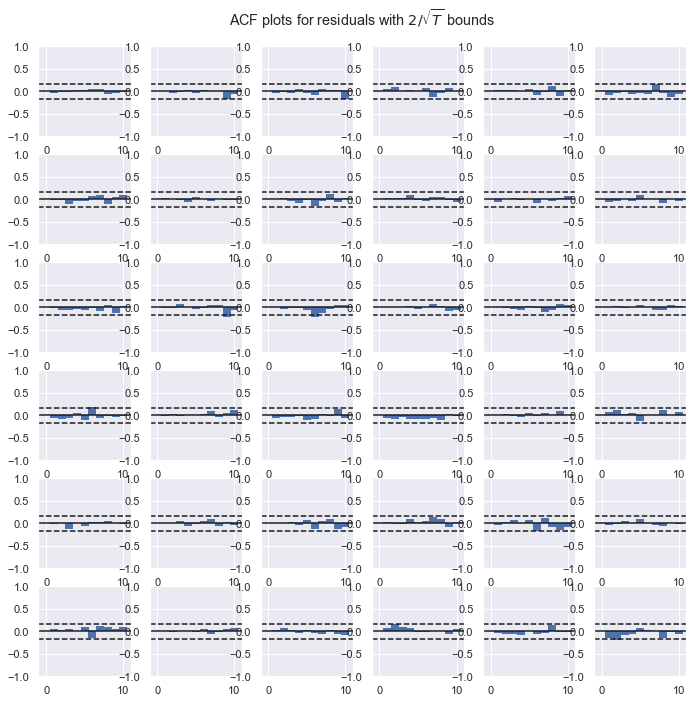

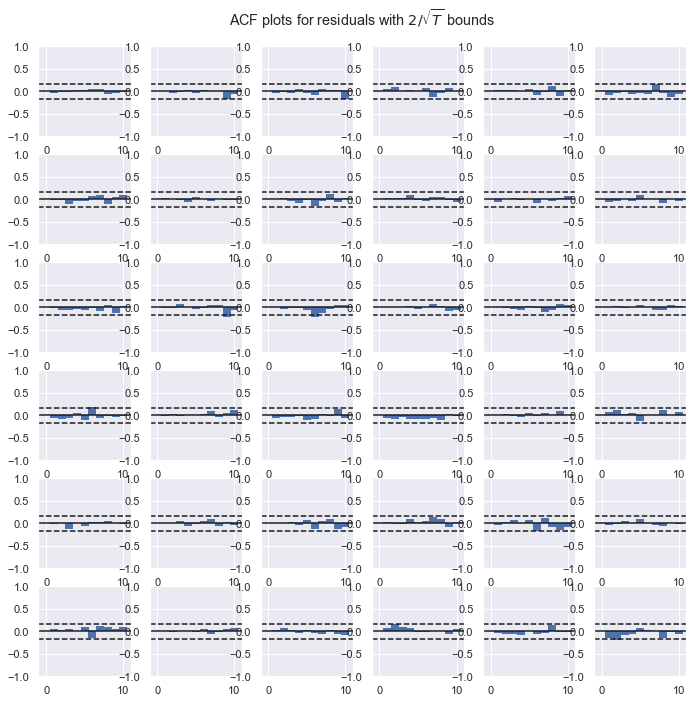

In [412]:
######### STABILITY RESIDUALS AUTOCORRELATION #########
model_fit.plot_acorr()

#if residuals out of range -> unstable model 

In [413]:
######### GRANGER CAUSALITY TEST #########
#for gas price
GrangerCausality = model_fit.test_causality('price_gas', ['open_interest_gas'], kind='f')
print(GrangerCausality.summary())

#granger causality test : HO not rejected => there is some causality between the variables

#importance of the order: if p value higher, does it mean that one variable is generating the other ?

Granger causality F-test. H_0: open_interest_gas does not Granger-cause price_gas. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value    df   
----------------------------------------------
         2.999          2.228   0.011 (5, 624)
----------------------------------------------


FEVD for price_gas
      price_gas  price_brent_usd  open_interest_gas   storage       lng  temperature
0      1.000000         0.000000           0.000000  0.000000  0.000000     0.000000
1      0.946058         0.014300           0.003936  0.000061  0.000432     0.035213
2      0.790725         0.023643           0.051904  0.010476  0.000364     0.122888
3      0.757446         0.022040           0.099636  0.009664  0.000572     0.110642
4      0.646845         0.038538           0.099301  0.008768  0.037703     0.168844
5      0.631500         0.038211           0.101450  0.009071  0.036683     0.183084
6      0.614518         0.037607           0.098298  0.029467  0.037848     0.182262
7      0.609403         0.045702           0.097561  0.029098  0.038254     0.179983
8      0.606931         0.045629           0.098184  0.030816  0.038042     0.180399
9      0.594568         0.045202           0.099653  0.033043  0.038172     0.189363
10     0.584238         0.044894           0.0

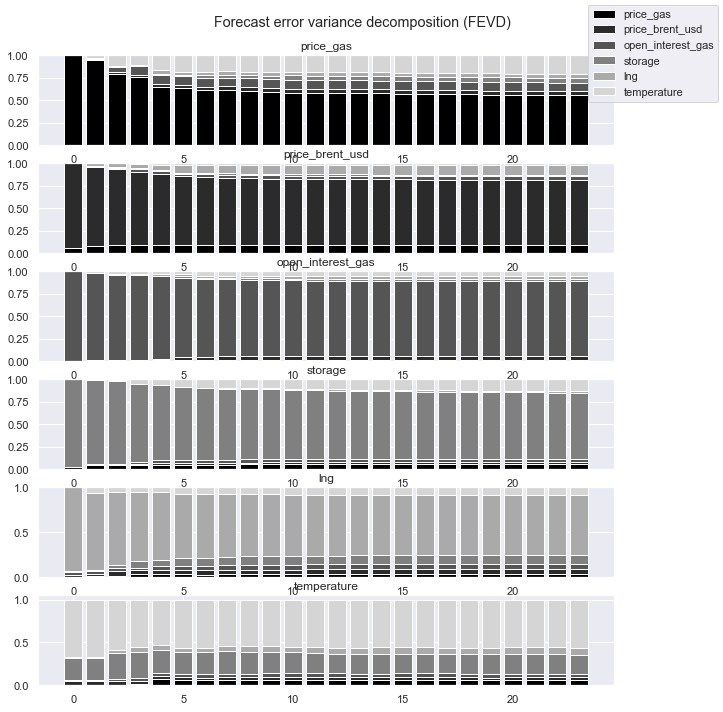

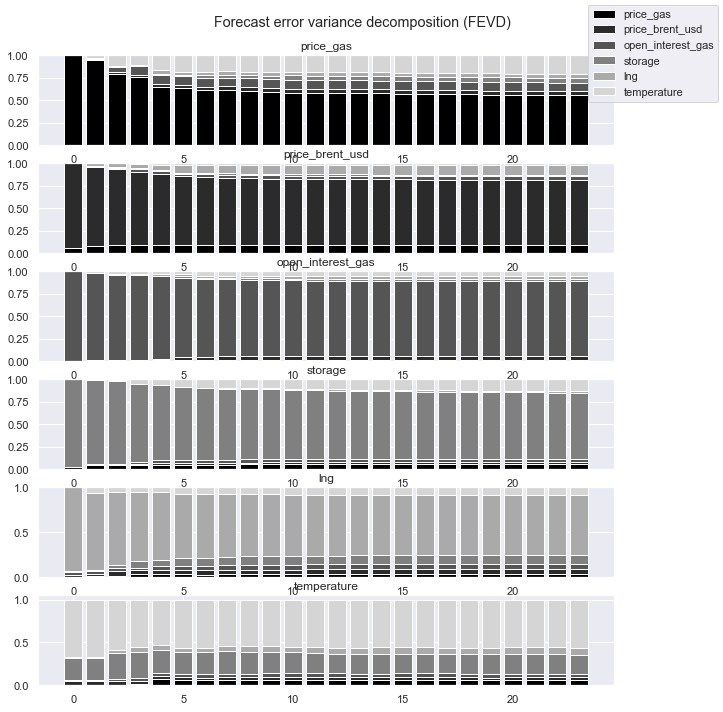

In [414]:
######### FORECAST VARIANCE ERROR DECOMPOSITION: #########

#only for 20 periods
n=24
fevd = model_fit.fevd(n)
fevd.summary()


#affichage pour n périodes
model_fit.fevd(n).plot()

IMPULSE RESPONSE ANALYSIS:

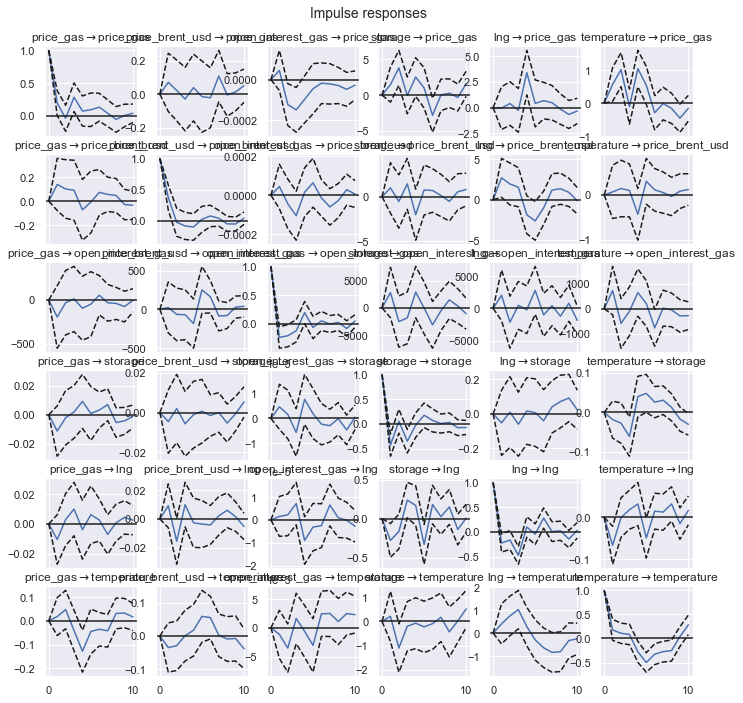

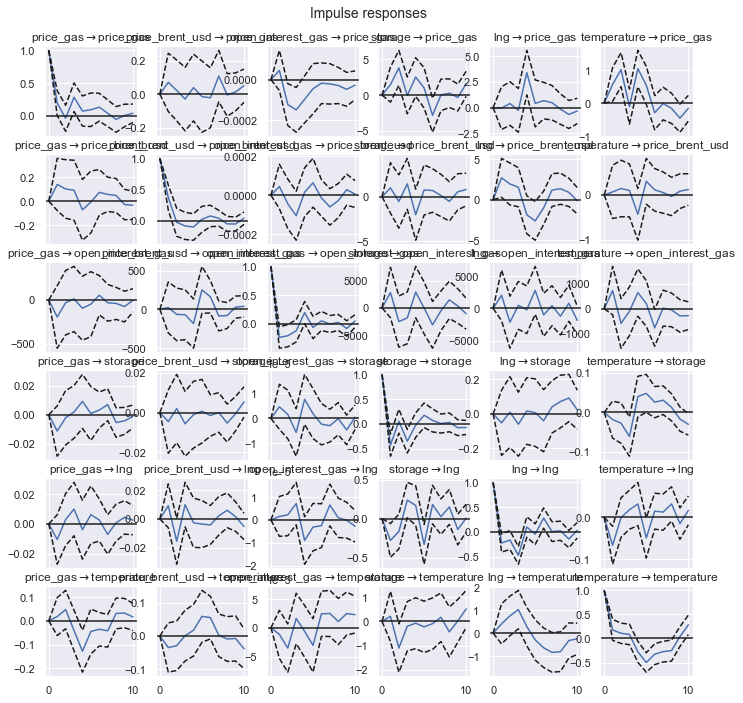

In [415]:
irf = model_fit.irf(10)
irf.plot()

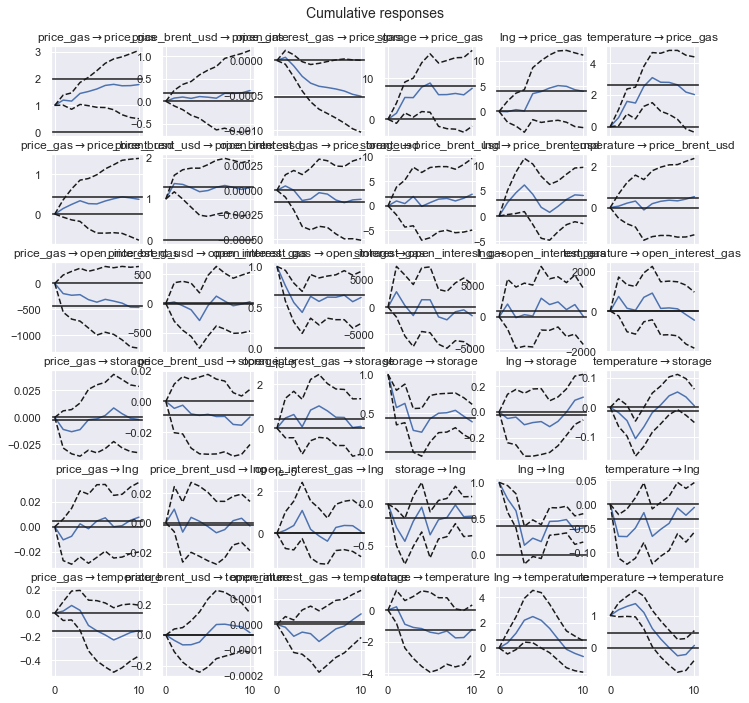

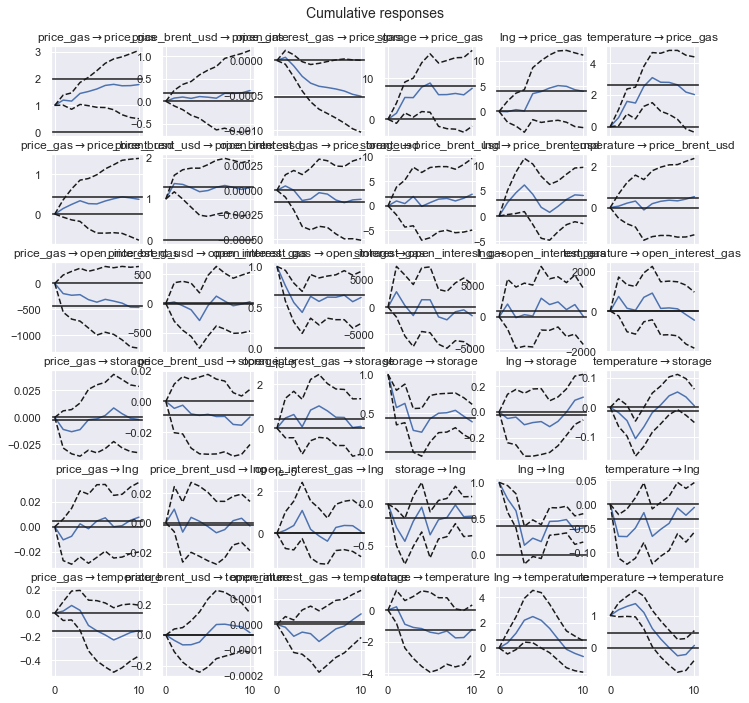

In [416]:
irf.plot_cum_effects(orth=False)

OTHER MODELS

In [417]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df_corr['price_gas'], order=(0, 3, 3)) 
results_ARIMA = model.fit()

results_ARIMA.summary()
#results_ARIMA.forecast(3)[0]


#results_ARIMA.plot_predict(start=20)
#plt.show()

/Users/lucruffie/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/lucruffie/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/lucruffie/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              price_gas   No. Observations:                  140
Model:                 ARIMA(0, 3, 3)   Log Likelihood                -449.777
Date:                Tue, 05 Jul 2022   AIC                            907.555
Time:                        18:40:36   BIC                            919.235
Sample:                             0   HQIC                           912.301
                                - 140                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -2.9719      0.818     -3.635      0.000      -4.574      -1.370
ma.L2          2.9687      1.619      1.833      0.067      -0.205       6.142
ma.L3         -0.9968      0.821     -1.215      0.224      -2.605       0.611
sigma2        34.9037     28.494      1.225      0.221     -20.944      90.752
===================================================================================
Ljung-Box (L1) (Q):                   9.62   Jarque-Bera (JB):                 4.19
Prob(Q):                              0.00   Prob(JB):                         0.12
Heteroskedasticity (H):               2.37   Skew:                             0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""